In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [13]:
# Load data
df = pd.read_csv("/Users/mariahloehr/IICD/IICD/Data/cell_cycle_tidied.csv")

# Define features and target
X = df.drop(columns=['phase', 'age', 'PHATE_1', 'PHATE_2'])  # Features
y = df['age']  # Target: age

feature_names = X.columns.tolist()
X = X.to_numpy()
y = y.to_numpy()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=949
)

In [3]:
# retrain model

xgb_model = XGBRegressor(
    n_estimators=500,
    eta = 0.05,
    gamma = 0,
    max_depth=5,
    random_state=949
)

xgb_model.fit(X_train, y_train)

# Predict
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

<Axes: title={'center': 'XGBoost MDI (Top 20)'}>

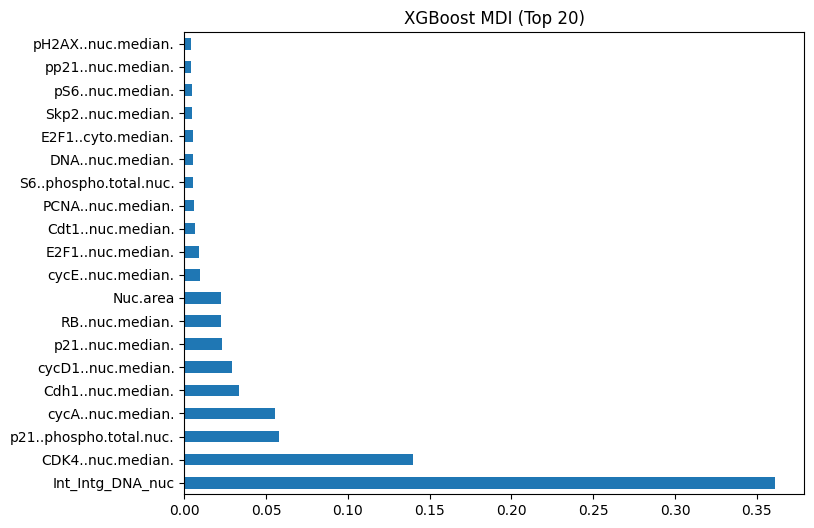

In [4]:
# MDI-based feature importances
xgb_importances = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
xgb_importances_sorted = xgb_importances.sort_values(ascending=False)

# Top features
xgb_importances_sorted.head(20).plot(kind='barh', figsize=(8, 6), title='XGBoost MDI (Top 20)')

LOCO

In [3]:
import sys
sys.path.append("/Users/mariahloehr/IICD/IICD/feature_importance")

In [4]:
import locomp
from locomp import *
from locomp.MLmodels import *
import itertools
import importlib
from sklearn.base import BaseEstimator, RegressorMixin, clone
import itertools
from functools import partial
import multiprocessing as mp
import re

In [9]:
def XGBreg(X,Y,X1):
    xgb = XGBRegressor(
    n_estimators=500,
    eta = 0.05,
    gamma = 0,
    max_depth=5,
    random_state=949
).fit(X,Y)
    return xgb.predict(X1)

In [10]:
J1 = 0
J2 = 1
m_ratio = 0.2
n_ratio = 0.2
B = 5000
fit_func = XGBreg

In [ ]:
x=LOCOMPReg(X_train,y_train,n_ratio,m_ratio,B,fit_func, selected_features=[],alpha=0.1,bonf=False)
x.run_loco()
#x.loco_ci